# RTI International Analytics Exercise
### Author: Sam Eure
### Date: May 31, 2019

In [23]:
import sqlite3
conn = sqlite3.connect('exercise01.sqlite')
cur = conn.cursor()

In [24]:
#SQLite query onsolidating the data into a single table using inner joins
query = cur.execute('SELECT records.id, records.over_50k, records.education_num, \
                        records.capital_gain, records.capital_loss, records.hours_week, records.age,\
                        workclasses.name AS workclass, \
                        education_levels.name AS education_level,\
                        marital_statuses.name AS marital_status,\
                        occupations.name AS occupation,\
                        relationships.name AS relationship,\
                        races.name AS race,\
                        sexes.name AS sex,\
                        countries.name AS country\
                        FROM records\
                        INNER JOIN workclasses ON workclasses.id = records.workclass_id\
                        INNER JOIN education_levels ON education_levels.id = records.education_level_id\
                        INNER JOIN marital_statuses ON marital_statuses.id = records.marital_status_id\
                        INNER JOIN occupations ON occupations.id = records.occupation_id\
                        INNER JOIN relationships ON relationships.id = records.relationship_id\
                        INNER JOIN races ON races.id = records.race_id\
                        INNER JOIN sexes ON sexes.id = records.sex_id\
                        INNER JOIN countries ON countries.id = records.country_id;').fetchall()

In [25]:
import pandas as pd

#Turn the list of the output from the query into a dataframe

columnNames = ["id","over_50k","education_num","capital_gain","capital_loss",
                "hours_week","age","workclass","education_level","marital_status",
                 "occupation","relationship","race","sex","country"]
df = pd.DataFrame(data = query, columns = columnNames)

#Column Headers


df.columns = columnNames

#Saving the data to a CSV
df.to_csv("data.csv", sep = ',', index = False)

#Showing the results
df.head()

,id,over_50k,education_num,capital_gain,capital_loss,hours_week,age,workclass,education_level,marital_status,occupation,relationship,race,sex,country
0,1,0,13,2174,0,40,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,2,0,13,0,0,13,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,3,0,9,0,0,40,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,4,0,7,0,0,40,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,5,0,13,0,0,40,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [26]:
#Now I'll look at the data types
df.dtypes

id                  int64
over_50k            int64
education_num       int64
capital_gain        int64
capital_loss        int64
hours_week          int64
age                 int64
workclass          object
education_level    object
marital_status     object
occupation         object
relationship       object
race               object
sex                object
country            object
dtype: object

In [27]:
#I'm going to grab only the rows with NO missing values
cleanDf = df.copy()
for c in columnNames:
    cleanDf = cleanDf[cleanDf[c].apply(lambda v: v != "?")]
print("Number of complete entries: ", len(cleanDf))
print("Number of incomplete entries:", len(df) - len(cleanDf))

Number of complete entries:  45222
Number of incomplete entries: 3620


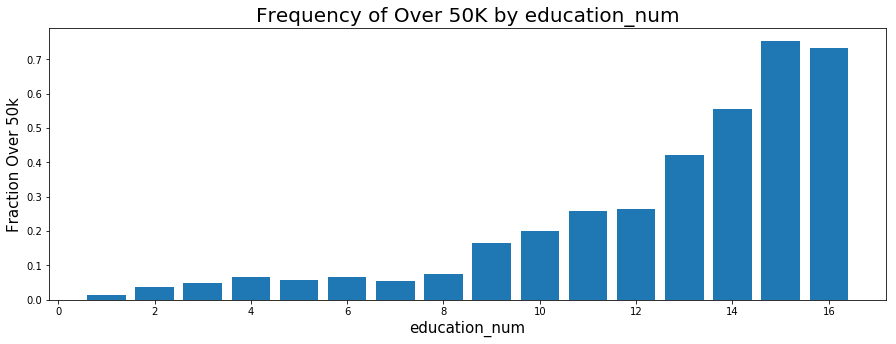

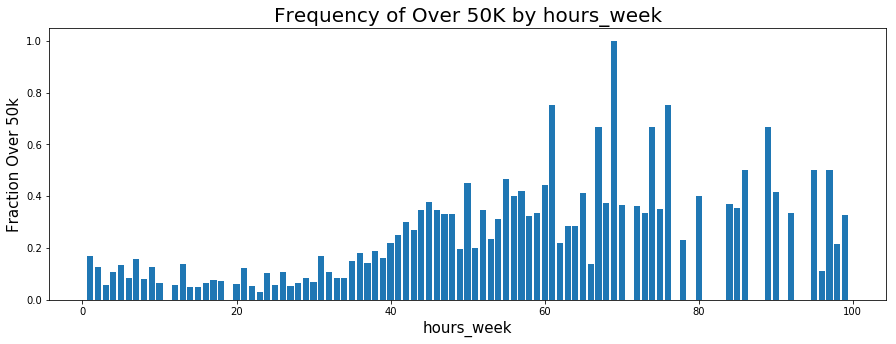

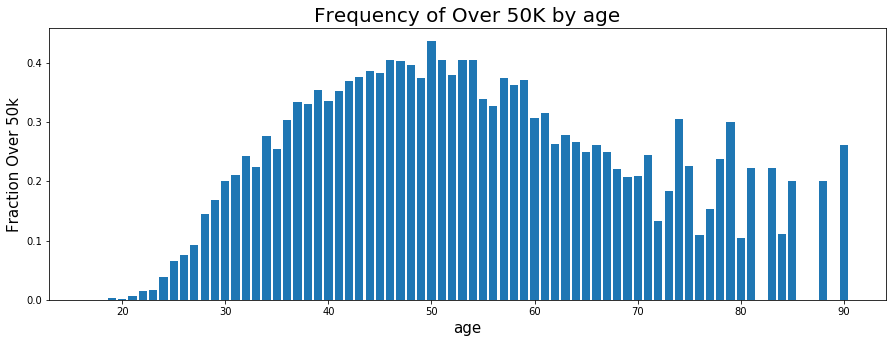

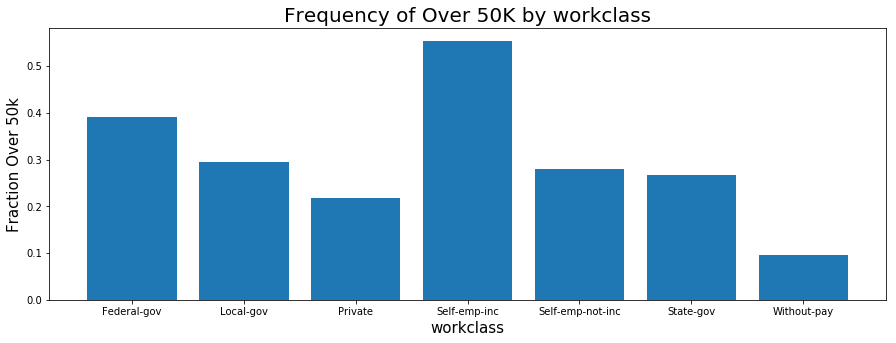

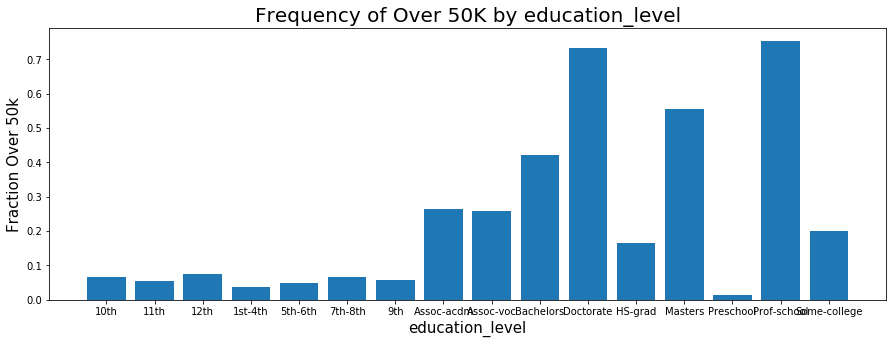

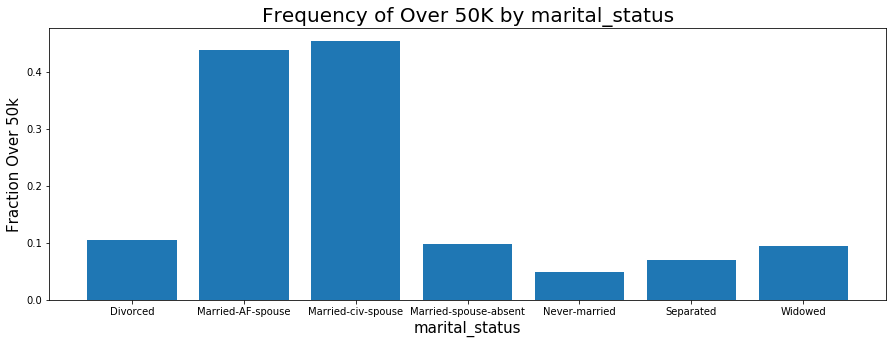

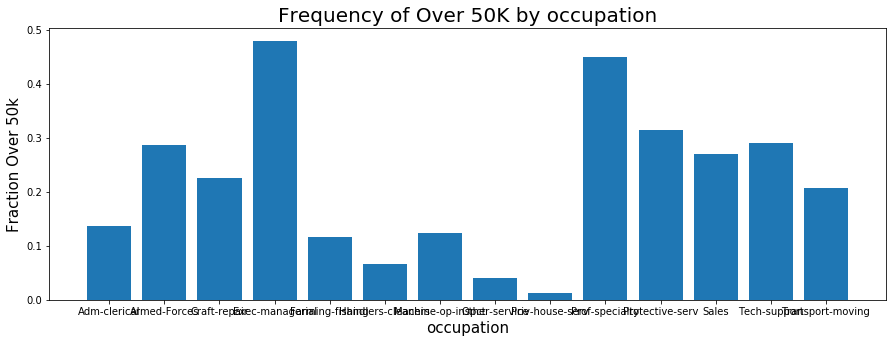

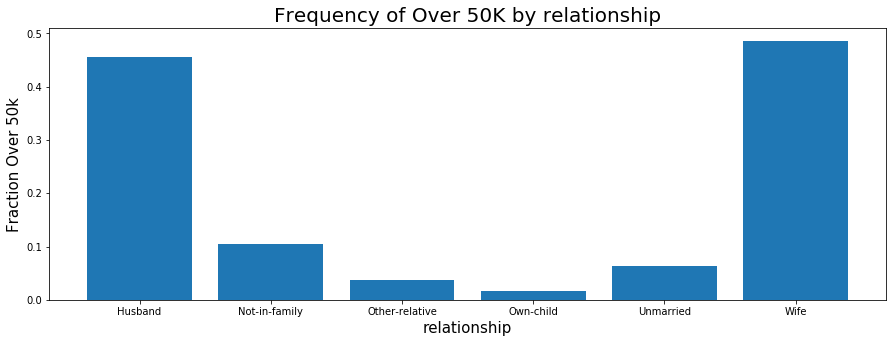

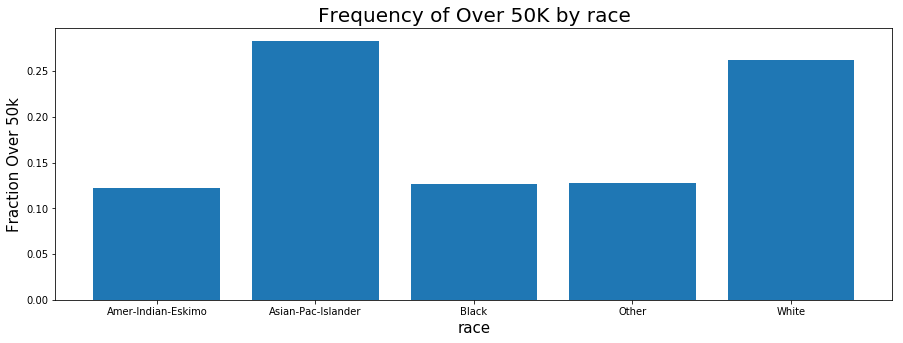

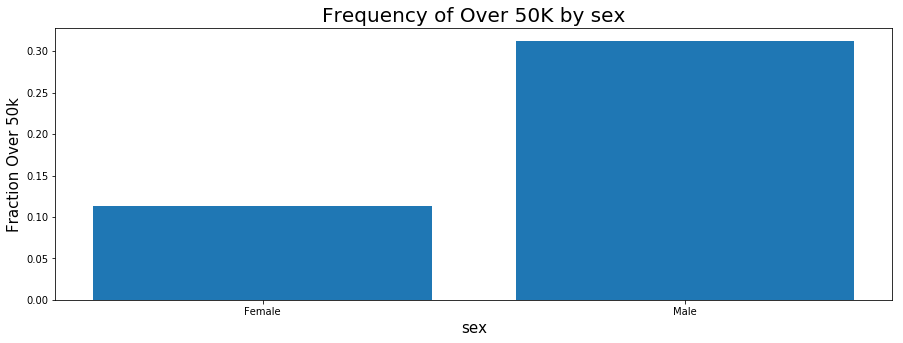

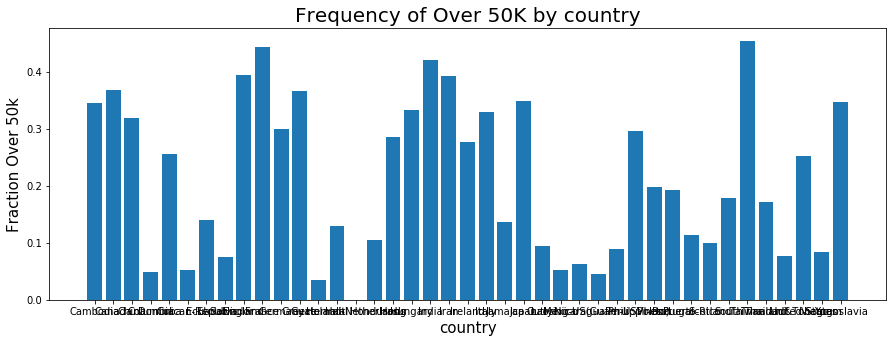

In [32]:
import matplotlib.pyplot as plt

columns = cleanDf.columns.tolist()
for j in range(len(columns)):
    if columns[j] in 'id, capital_gain, capital_loss, over_50k':
        continue;
    means = cleanDf.groupby(columns[j]).mean().over_50k.tolist()
    names = cleanDf[columns[j]].unique().tolist()
    names.sort()
    fig = plt.figure(figsize = (15,5))
    plt.bar(names,means)
    plt.title("Frequency of Over 50K by "+columns[j], fontsize = 20)
    plt.xlabel(columns[j], fontsize = 15)
    plt.ylabel("Fraction Over 50k", fontsize = 15)

#### Although I can't see what the labels at the bottom of all the figures above state, I can tell that the frequency of workers making over 50K a year depend on the variables being plotted.

#### I'll use some machine learning techniques to create a classification model for determining if an individual earns over 50 K dollars a year based on their census level data. First, I'll divide my data set into a train, validation, and test data sets. I'll used the cleanDf (which is contains the data points with complete entries) as my data set.

In [42]:
import random
random.seed(1)

#Splitting the data set into training, validation, and testing data sets. 
tenth = round(0.1*len(cleanDf)) #The number of data points comprising roughly one-tenth of the data. 
trainX, trainY = cleanDf.iloc[:(8*tenth),2:], cleanDf.iloc[:(8*tenth), 1]
valX,   valY   = cleanDf.iloc[(8*tenth):(9*tenth),2:], cleanDf.iloc[(8*tenth):(9*tenth), 1]
testX,  testY  = cleanDf.iloc[(9*tenth):,2:], cleanDf.iloc[(9*tenth):, 1]

print("Size of training data:  ", len(trainX))
print("Size of validation data:", len(valX))
print("Size of testing data:   ", len(testX))

Size of training data:   36176
Size of validation data: 4522
Size of testing data:    4524
